In [26]:
#패키지 설치
# 1. GitHub 리포지토리 복제
!git clone https://github.com/PrincetonUniversity/fusionrate.git

# 2. requirements.txt를 대신, 필요한 패키지 직접 설치
# (오류가 발생하는 projectdirs==2.6.2는 제외하고 설치합니다)
!pip install numpy scipy matplotlib numba cubature

# 3. 파이썬 시스템 경로에 fusionrate folder add
import sys
sys.path.append('/content/fusionrate')

fatal: destination path 'fusionrate' already exists and is not an empty directory.


In [70]:
from fusionrate import Reaction

# 5. 깃허브 베이스 코드 실행
print("Running the fusion rate calculation...")
dt = Reaction("D+T")
temperature = 10  # keV
cs = dt.cross_section(temperature)  # millibarns

# 6. 결과 확인
print(f"The cross section at {temperature} keV is: {cs.item():.4f} millibarns")
# 온도 공간 정의 후 넣기
# scheme = analytic 혹은 100keV이상의 온도에서는 scheme = "integration" 필수..!! , 기본 key인 scheme = interpolation 작동 x
import numpy as np
temperatures = np.logspace(-2,4) # keV
rc = dt.rate_coefficient(temperatures, distribution = "Maxwellian", scheme = "integration"  )  # in cm³/s

# To get derivatives of rate coefficients, in  cm³/s/keV
rc_derivs = dt.rate_coefficient(temperatures, distribution = "Maxwellian", scheme = "analytic" ,derivatives=True)
print(rc_derivs)

Running the fusion rate calculation...
The cross section at 10 keV is: 26.7086 millibarns
[ 6.74125681e-25  6.74125681e-25  6.74125681e-25  6.74125681e-25
  6.74125681e-25  6.74125681e-25  6.74125681e-25  6.74125681e-25
  6.74125681e-25  6.74125681e-25  6.74125681e-25  1.78344770e-24
  1.96527026e-23  1.66474631e-22  1.11120825e-21  5.98081941e-21
  2.65222897e-20  9.88989630e-20  3.16118738e-19  8.81568155e-19
  2.17680725e-18  4.80322337e-18  9.47019327e-18  1.64857684e-17
  2.47956482e-17  3.14927004e-17  3.32995147e-17  2.92237927e-17
  2.12562246e-17  1.25319881e-17  5.38340517e-18  7.18942664e-19
 -1.64206268e-18 -2.26938052e-18 -2.26938052e-18 -2.26938052e-18
 -2.26938052e-18 -2.26938052e-18 -2.26938052e-18 -2.26938052e-18
 -2.26938052e-18 -2.26938052e-18 -2.26938052e-18 -2.26938052e-18
 -2.26938052e-18 -2.26938052e-18 -2.26938052e-18 -2.26938052e-18
 -2.26938052e-18 -2.26938052e-18]


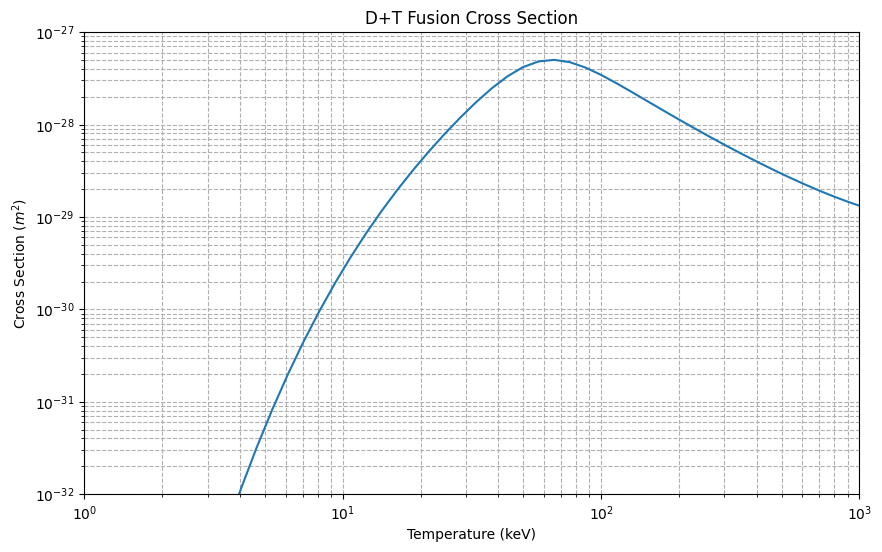

In [61]:
import matplotlib.pyplot as plt

# 온도를 log-스케일로 설정
temperatures = np.logspace(-2, 4, 100) # 10^-2 keV 부터 10^4 keV 까지 100개의 점

# 각 온도에서 단면적(cross section) 계산
css = dt.cross_section(temperatures)  # millibarns
css_m2 = css*1e-31 #m^2

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(temperatures, css_m2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Temperature (keV)')
plt.ylabel('Cross Section ($m^2$)')
plt.title('D+T Fusion Cross Section')
plt.xlim(1, 1000)
plt.ylim(1e-32, 1e-27)
plt.grid(True, which="both", ls="--")
plt.show()

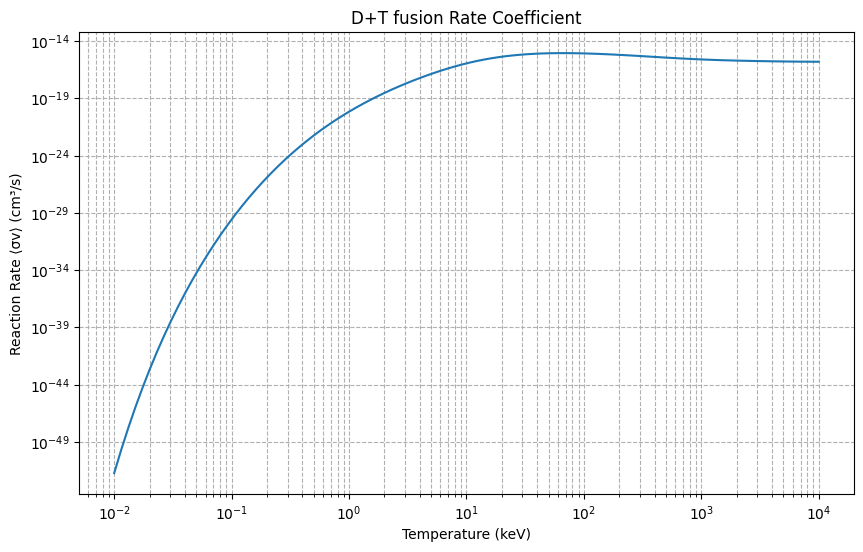

In [31]:
# 온도를 log-스케일로 설정
temperatures = np.logspace(-2, 4, 100) # 10^-2 keV 부터 10^4 keV 까지 100개의 점

# 각 온도에서 반응률 계수(rate coefficient) 계산
rc = dt.rate_coefficient(temperatures, distribution = "Maxwellian", scheme = "integration"  )  # cm³/s

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(temperatures, rc)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Temperature (keV)')
plt.ylabel('Reaction Rate ⟨σv⟩ (cm³/s)')
plt.title('D+T fusion Rate Coefficient')
plt.grid(True, which="both", ls="--")
plt.show()

Analysis Temperature Range: 1.00 - 10000.00 keV
Temperatures where ignition_possible is True: 4.33 ~ 2462.59 keV


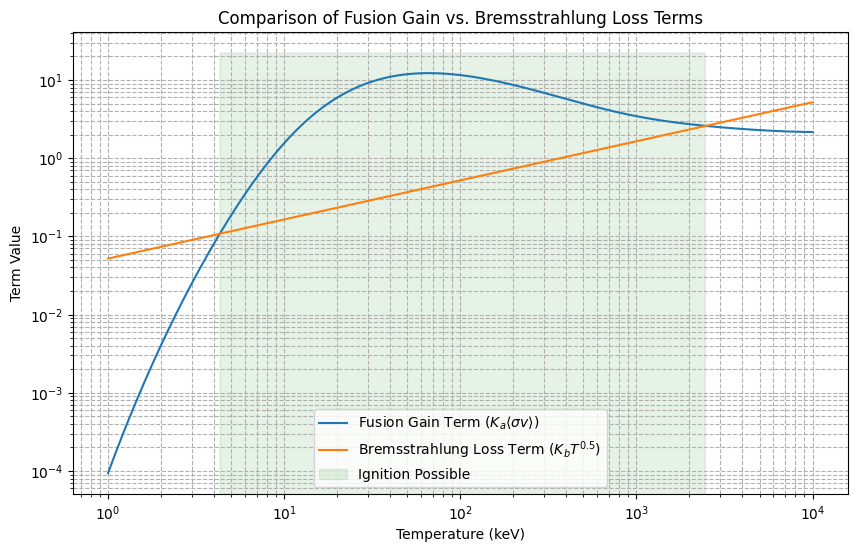

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# 필요한 상수 정의
Ka = 1.37
Kb = 0.052
KI = 0.11
KK = 0.15

# D+T 반응 객체 생성
from fusionrate import Reaction
dt = Reaction("D+T")

# 온도 범위 설정 (점화가 가능했던 범위와 그 이상 포함)
T_k_analysis = np.logspace(0, 4, 1000) # 1 keV 부터 1000 keV 까지

# 각 온도에 대한 반응률 계수 계산
sv_cm3_s_analysis = dt.rate_coefficient(T_k_analysis, distribution="Maxwellian", scheme="integration")

# 단위 변환: cm³/s -> 10⁻²² m³/s
sv_m3_s_analysis = sv_cm3_s_analysis * 1e-6
sv_formula_analysis = sv_m3_s_analysis / 1e-22

# 두 항 계산
fusion_gain_term = Ka * sv_formula_analysis
bremsstrahlung_loss_term = Kb * T_k_analysis**0.5

# 점화 가능 조건 다시 확인 (이 온도 범위에 대해)
ignition_check = (fusion_gain_term - bremsstrahlung_loss_term) > 0
print(f"Analysis Temperature Range: {T_k_analysis.min():.2f} - {T_k_analysis.max():.2f} keV")
# Check if there are any True values before trying to get min/max
if np.any(ignition_check):
    print(f"Temperatures where ignition_possible is True: {T_k_analysis[ignition_check].min():.2f} ~ {T_k_analysis[ignition_check].max():.2f} keV")
else:
    print("Ignition is not possible in the analysis temperature range.")


# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(T_k_analysis, fusion_gain_term, label=r'Fusion Gain Term ($K_a \langle \sigma v \rangle$)')
plt.plot(T_k_analysis, bremsstrahlung_loss_term, label=r'Bremsstrahlung Loss Term ($K_b T^{0.5}$)')

plt.xscale('log')
plt.yscale('log') # Y축도 로그 스케일로 설정하여 비교 용이
plt.xlabel("Temperature (keV)")
plt.ylabel("Term Value")
plt.title("Comparison of Fusion Gain vs. Bremsstrahlung Loss Terms")
plt.legend()
plt.grid(True, which="both", ls="--")

# 점화 가능한 영역을 배경색으로 표시
plt.fill_between(T_k_analysis, 0, plt.ylim()[1], where=ignition_check, color='green', alpha=0.1, label='Ignition Possible')
plt.legend()

plt.show()

그래프가 'legend_min_values_plot.png' 파일로 저장되었습니다.


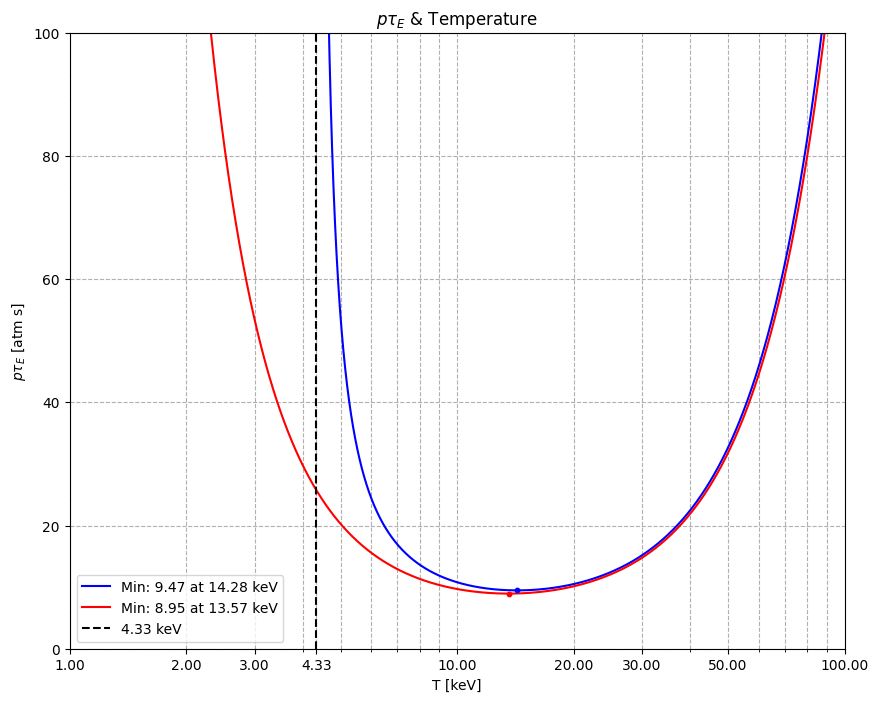

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 1. 책에 명시된 상수 정의
Ka = 1.37
Kb = 0.052
KI = 0.11
KK = 0.15

dt = Reaction("D+T")

# 3. 온도 범위 설정
T_k = np.logspace(0, 3, 10000) # keV

# 4. 각 온도에 대한 반응률 계수 계산
sv_cm3_s = dt.rate_coefficient(T_k, distribution="Maxwellian", scheme="integration")

# 5. 단위 변환: cm³/s -> 10⁻²² m³/s
sv_m3_s = sv_cm3_s * 1e-6
sv_formula = sv_m3_s / 1e-22

# 6. p*tau_E 및 p 계산
ignition_possible = (Ka * sv_formula - Kb * T_k**0.5) > 0
T_k_ignition = T_k[ignition_possible]
p_tau_E = (KK * (T_k_ignition)**2) / \
          (Ka * sv_formula[ignition_possible] - Kb * (T_k_ignition)**0.5)

p_calculable = sv_formula > 0
T_k_for_p = T_k[p_calculable]
p = (KI * T_k_for_p**2) / (sv_formula[p_calculable])

# 최솟값 찾기
min_p_tau_E = np.min(p_tau_E)
min_p_tau_E_temp = T_k_ignition[np.argmin(p_tau_E)]
min_p = np.min(p)
min_p_temp = T_k_for_p[np.argmin(p)]

# --- 그래프 그리기 ---
plt.figure(figsize=(10, 8))

# 1. 범례에 넣을 라벨 문자열을 생성합니다.
p_tau_E_label = f'Min: {min_p_tau_E:.2f} at {min_p_tau_E_temp:.2f} keV'
p_label = f'Min: {min_p:.2f} at {min_p_temp:.2f} keV'

# 2. 생성한 라벨을 사용하여 플롯을 그립니다.
plt.plot(T_k_ignition, p_tau_E, 'b-', label=p_tau_E_label)
plt.plot(T_k_for_p, p, 'r-', label=p_label)

# 스케일, 축 범위, 눈금 설정 (기존과 동일)
plt.xscale('log')
plt.xlim(1, 100)
plt.ylim(0, 100)
ax = plt.gca()
xticks = [1, 2, 3, 4.33, 10, 20, 30, 50, 100]
ax.set_xticks(xticks)
ax.get_xaxis().set_major_formatter(mticker.ScalarFormatter())

# 수직 점선, 라벨, 제목, 그리드 설정 (기존과 동일)
plt.axvline(x=4.33, color='black', linestyle='--', label='4.33 keV')
plt.xlabel("T [keV]")
plt.ylabel("$pτ_E$ [atm s]")
plt.title("$pτ_E$ & Temperature")
plt.grid(True, which="both", ls="--")

# 최솟값 지점 점으로 표시 (화살표 없이 점만 유지)
plt.scatter(min_p_tau_E_temp, min_p_tau_E, color='blue', s=10, zorder=5)
if not np.isnan(min_p_temp):
    plt.scatter(min_p_temp, min_p, color='red', s=10, zorder=5)

# 3. 최종적으로 범례를 추가합니다.
plt.legend(fontsize='medium') # 범례 폰트 크기 조절 가능

plt.savefig("legend_min_values_plot.png")
print("그래프가 'legend_min_values_plot.png' 파일로 저장되었습니다.")

p*tau_E의 최솟값: 9.47 atm·s (온도: 14.28 keV)
p의 최솟값: 8.95 atm·s (온도: 13.57 keV)
그래프가 'single_axis_plot.png' 파일로 저장되었습니다.


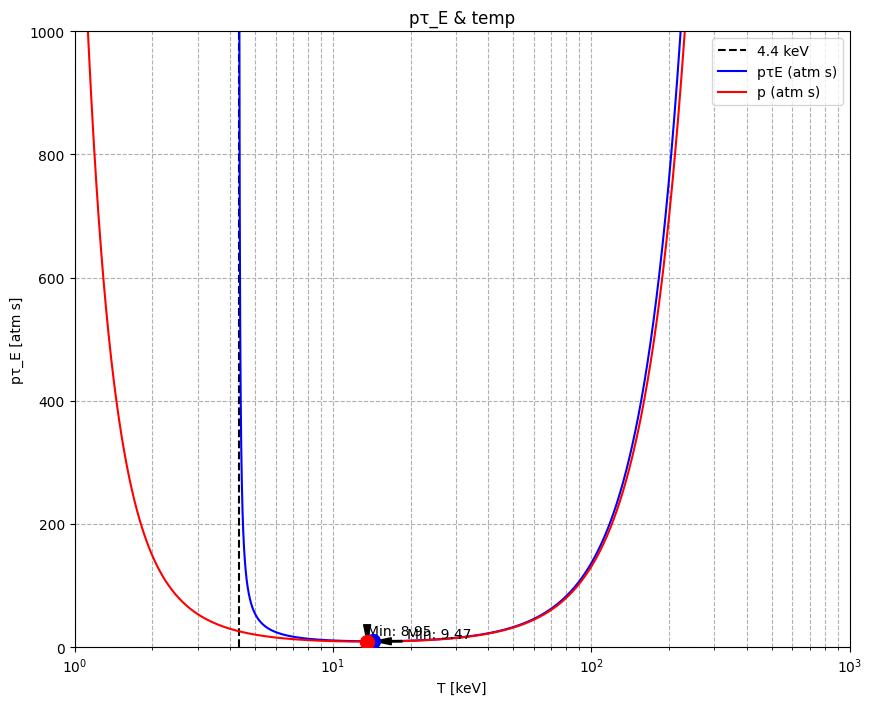

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 책에 명시된 상수 정의
Ka = 1.37
Kb = 0.052
KI = 0.11
KK = 0.15

# 2. D+T 반응 객체 생성
dt = Reaction("D+T")

# 3. 온도 범위 설정
T_k = np.logspace(0, 3, 10000) # keV

# 4. 각 온도에 대한 반응률 계수 계산
sv_cm3_s = dt.rate_coefficient(T_k, distribution="Maxwellian", scheme="integration")

# 5. 단위 변환: cm³/s -> 10⁻²² m³/s
sv_m3_s = sv_cm3_s * 1e-6
sv_formula = sv_m3_s / 1e-22

# 6. p*tau_E 및 p 계산
# Ignition is possible only when the denominator is positive
ignition_possible = (Ka * sv_formula - Kb * T_k**0.5) > 0
p_tau_E = (KK * (T_k[ignition_possible])**2) / \
(Ka * sv_formula[ignition_possible] - Kb * (T_k[ignition_possible])**0.5)

# Filter for non-zero sv_formula for p calculation to avoid division by zero
p_calculable = sv_formula > 0
p = (KI * T_k[p_calculable]**2) / (sv_formula[p_calculable])
T_k_for_p = T_k[p_calculable] # Corresponding temperatures for p

# 최솟값 찾기
min_p_tau_E = np.min(p_tau_E)
min_p_tau_E_temp = T_k[ignition_possible][np.argmin(p_tau_E)]
min_p = np.min(p)
min_p_temp = T_k_for_p[np.argmin(p)]

# 최솟값 출력
print(f"p*tau_E의 최솟값: {min_p_tau_E:.2f} atm·s (온도: {min_p_tau_E_temp:.2f} keV)")
print(f"p의 최솟값: {min_p:.2f} atm·s (온도: {min_p_temp:.2f} keV)")

# 7. 그래프 그리기

plt.figure(figsize=(10, 8))

# 4.33 keV에 수직 점선 추가
plt.axvline(x=4.33, color='black', linestyle='--', label='4.4 keV')

# x축 눈금에 4.33 추가 (로그 스케일용)
# 기본 눈금들과 4.33를 함께 설정
xticks = [1, 2, 3, 4.33, 5, 10, 20, 30, 50, 100, 1000]
plt.xticks(xticks, [str(x) for x in xticks])  # 숫자를 문자열로 변환해서 표시

# p*tau_E와 p를 동일 축에 플롯
plt.plot(T_k[ignition_possible], p_tau_E, 'b-', label='pτE (atm s)')
# Plot p only where calculable
plt.plot(T_k_for_p, p, 'r-', label='p (atm s)')

plt.xscale('log')
plt.xlim(1, 1000)
plt.ylim(0, 1000) # 두 변수를 모두 포함하는 범위로 설정

plt.xlabel("T [keV]")
plt.ylabel("pτ_E [atm s]")
plt.title("pτ_E & temp")
plt.grid(True, which="both", ls="--")

# 최솟값 지점 점으로 표시
plt.scatter(min_p_tau_E_temp, min_p_tau_E, color='blue', s=100, zorder=5) # p_tau_E 최솟값
if not np.isnan(min_p_temp):
    plt.scatter(min_p_temp, min_p, color='red', s=100, zorder=5) # p 최솟값


# 최솟값 지점에 텍스트와 화살표 추가
plt.annotate(f'Min: {min_p_tau_E:.2f}',
             xy=(min_p_tau_E_temp, min_p_tau_E),
             xytext=(min_p_tau_E_temp + 5, min_p_tau_E + 5), # 텍스트 위치
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))

if not np.isnan(min_p_temp):
    plt.annotate(f'Min: {min_p:.2f}',
                 xy=(min_p_temp, min_p),
                 xytext=(min_p_temp, min_p + 10), # 텍스트 위치
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))

plt.legend()
# plt.show() # Removed plt.show() before savefig

plt.savefig("single_axis_plot.png")
print("그래프가 'single_axis_plot.png' 파일로 저장되었습니다.")

p*tau_E의 최솟값: 9.47 atm·s (온도: 14.23 keV)
p의 최솟값: 8.95 atm·s (온도: 13.59 keV)
그래프가 'single_axis_plot.png' 파일로 저장되었습니다.


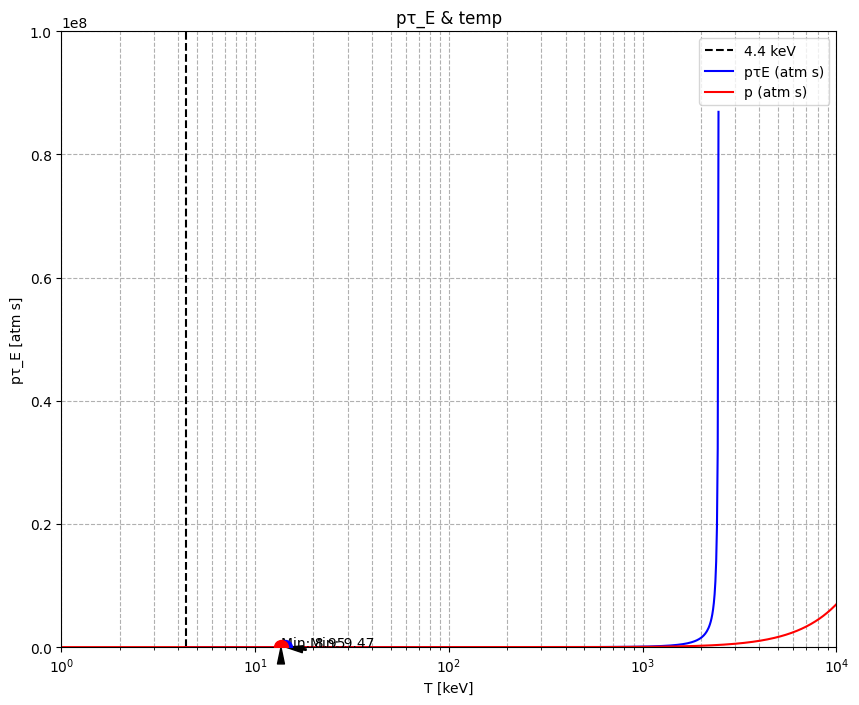

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 책에 명시된 상수 정의
Ka = 1.37
Kb = 0.052
KI = 0.11
KK = 0.15

# 2. D+T 반응 객체 생성
dt = Reaction("D+T")

# 3. 온도 범위 설정
T_k = np.logspace(0, 4, 1000) # keV

# 4. 각 온도에 대한 반응률 계수 계산
sv_cm3_s = dt.rate_coefficient(T_k, distribution="Maxwellian", scheme="integration")

# 5. 단위 변환: cm³/s -> 10⁻²² m³/s
sv_m3_s = sv_cm3_s * 1e-6
sv_formula = sv_m3_s / 1e-22

# 6. p*tau_E 및 p 계산
# Ignition is possible only when the denominator is positive
ignition_possible = (Ka * sv_formula - Kb * T_k**0.5) > 0
p_tau_E = (KK * (T_k[ignition_possible])**2) / \
(Ka * sv_formula[ignition_possible] - Kb * (T_k[ignition_possible])**0.5)

# Filter for non-zero sv_formula for p calculation to avoid division by zero
p_calculable = sv_formula > 0
p = (KI * T_k[p_calculable]**2) / (sv_formula[p_calculable])
T_k_for_p = T_k[p_calculable] # Corresponding temperatures for p

# 최솟값 찾기
min_p_tau_E = np.min(p_tau_E)
min_p_tau_E_temp = T_k[ignition_possible][np.argmin(p_tau_E)]
min_p = np.min(p)
min_p_temp = T_k_for_p[np.argmin(p)]

# 최솟값 출력
print(f"p*tau_E의 최솟값: {min_p_tau_E:.2f} atm·s (온도: {min_p_tau_E_temp:.2f} keV)")
print(f"p의 최솟값: {min_p:.2f} atm·s (온도: {min_p_temp:.2f} keV)")

# 7. 그래프 그리기

plt.figure(figsize=(10, 8))

# 4.4 keV에 수직 점선 추가
plt.axvline(x=4.4, color='black', linestyle='--', label='4.4 keV')

# x축 눈금에 4.4 추가 (로그 스케일용)
# 기본 눈금들과 4.4를 함께 설정
xticks = [1, 2, 3, 4.4, 5, 10, 20, 30, 50, 100]
plt.xticks(xticks, [str(x) for x in xticks])  # 숫자를 문자열로 변환해서 표시

# p*tau_E와 p를 동일 축에 플롯
plt.plot(T_k[ignition_possible], p_tau_E, 'b-', label='pτE (atm s)')
# Plot p only where calculable
plt.plot(T_k_for_p, p, 'r-', label='p (atm s)')

plt.xscale('log')
plt.xlim(1, 10000)
plt.ylim(0, 100000000) # 두 변수를 모두 포함하는 범위로 설정

plt.xlabel("T [keV]")
plt.ylabel("pτ_E [atm s]")
plt.title("pτ_E & temp")
plt.grid(True, which="both", ls="--")

# 최솟값 지점 점으로 표시
plt.scatter(min_p_tau_E_temp, min_p_tau_E, color='blue', s=100, zorder=5) # p_tau_E 최솟값
if not np.isnan(min_p_temp):
    plt.scatter(min_p_temp, min_p, color='red', s=100, zorder=5) # p 최솟값


# 최솟값 지점에 텍스트와 화살표 추가
plt.annotate(f'Min: {min_p_tau_E:.2f}',
             xy=(min_p_tau_E_temp, min_p_tau_E),
             xytext=(min_p_tau_E_temp + 5, min_p_tau_E + 5), # 텍스트 위치
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))

if not np.isnan(min_p_temp):
    plt.annotate(f'Min: {min_p:.2f}',
                 xy=(min_p_temp, min_p),
                 xytext=(min_p_temp, min_p + 10), # 텍스트 위치
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))

plt.legend()
# plt.show() # Removed plt.show() before savefig

plt.savefig("single_axis_plot.png")
print("그래프가 'single_axis_plot.png' 파일로 저장되었습니다.")